array([-3.63354527])

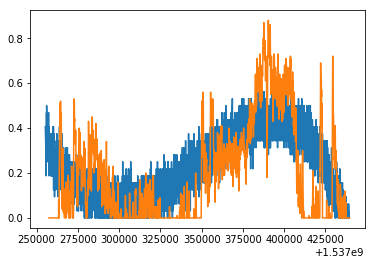

In [117]:
%matplotlib inline  
import csv
import pandas as pd
import numpy as np
import sklearn
import scipy
from matplotlib import pyplot
from sklearn.linear_model import Ridge

data1 = pd.read_csv('Aeroqual_CO_O3_timestamp.csv', sep = ',')
data2 = pd.read_csv('Photon_CO.csv', sep = ',')
a = data1.fillna(method= 'bfill',axis = 1)
data1['CO(ppm)'] = data1['CO(ppm)'].replace(' ', np.nan, regex=True)
data1['O3(ppm)'] = data1['O3(ppm)'].replace(' ', np.nan, regex=True)
data1 = data1.fillna(method= 'bfill',axis = 1)
x = data1['CO(ppm)'].values
#x = x.astype(np.float)
y = data1['Timestamp'].values
#y = y.astype(np.float)
c = np.vander(y,15)
x = x.reshape(-1,1)
y = y.reshape(-1,1)
nt = np.linspace(data1['Timestamp'][0],data1['Timestamp'][data1['Timestamp'].index[-1]] ,data1['Timestamp'][data1['Timestamp'].index[-1]]- data1['Timestamp'][0]) 
a = Ridge()
a.fit(c,x)
y1 = data2['Timestamp'].values
y1 = y1.astype(np.float)
c1 = np.vander(y1,15)
y1 = y1.reshape(-1,1)
x1 = a.predict(c1)
x1.reshape(-1,1)
for i in range(len(x1)):
    if x1[i] < 0:
        x1[i] = 0
pyplot.plot(y1,x1) 
pyplot.plot(y,x) 
data2['CO(ppb)'] = data2['CO(ppb)']/1000
np.savetxt('predict_CO.csv', np.column_stack((y1,data2['CO(ppb)'],x1)), fmt='%d,%s,%s')
actual = data2['CO(ppb)'].values
actual = actual.reshape(-1,1)
error = x1 - actual
e = sum(error)/len(error)
e

In [114]:

len(nt)

182160